#### Here we have imported the important libraries, which will help us in the creation of the model and cleaning of data.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import re
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

### We will read the data using Pandas.



In [3]:
data = pd.read_csv("/content/Tweet_NFT.xlsx - Sheet1.csv")

In [4]:
data 

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763,Need Sick Character artâ“#art #artist #Artist...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community
...,...,...,...,...
127448,1278721,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z,NaN
127449,1278723,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,NaN
127450,1278724,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z,NaN
127451,1278725,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z,NaN


### We will analyse dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127453 entries, 0 to 127452
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                127453 non-null  int64 
 1   tweet_text        127453 non-null  object
 2   tweet_created_at  127453 non-null  object
 3   tweet_intent      96364 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.9+ MB


In [6]:
data.isna().sum()

id                      0
tweet_text              0
tweet_created_at        0
tweet_intent        31089
dtype: int64

In [7]:
data.shape

(127453, 4)

In [8]:
data.columns

Index(['id', 'tweet_text', 'tweet_created_at', 'tweet_intent'], dtype='object')

### We will drop null values from dataset

In [9]:
data.dropna(subset=['tweet_text', 'tweet_intent'], inplace=True)

In [10]:
data["tweet_intent"].value_counts()

Community         41510
Giveaway          21041
Appreciation      16451
Whitelist          8320
Presale            5107
Done               3049
pinksale            477
Interested          276
Launching Soon      133
Name: tweet_intent, dtype: int64

###  Keeping only the neccessary columns

In [11]:

data = data[['tweet_text','tweet_intent']]


In [12]:
data

,tweet_text,tweet_intent
0,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,Community
1,Need Sick Character artâ“#art #artist #Artist...,Giveaway
2,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,Appreciation
3,@CryptoBatzNFT @DarekBTW The first project in ...,Community
4,@sashadysonn The first project in crypto with ...,Community
...,...,...
96359,@nft_cryptogang @liuyan93721534 0x9fE808D8a9E2...,Appreciation
96360,Just registered to win @cryptopunksnfts #1859 ...,Presale
96361,"@SolSniffer Dyor on the nft collection ""Dictat...",Appreciation
96362,#NFT #NFTCommmunity #DeltaFlare\nJoin me on Di...,Community


#### We will create a function to remove unwanted characters in Tweets using Regex.

In [13]:
def preProcess_data(text):
   text = text.lower()
   new_text = re.sub('[^a-zA-z0-9\s]','',text)
   new_text = re.sub('rt', '', new_text)
   return new_text

data['tweet_text'] = data['tweet_text'].apply(preProcess_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
data

,tweet_text,tweet_intent
0,crypto_brody ecology1990 moonrunnersnft itsuki...,Community
1,need sick character aa aist aists animation il...,Giveaway
2,the_hulk_nft inagotchinft tesla killabearsnft ...,Appreciation
3,cryptobatznft darekbtw the first project in cr...,Community
4,sashadysonn the first project in crypto with m...,Community
...,...,...
96359,nft_cryptogang liuyan93721534 0x9fe808d8a9e2e3...,Appreciation
96360,just registered to win cryptopunksnfts 1859 wi...,Presale
96361,solsniffer dyor on the nft collection dictator...,Appreciation
96362,nft nftcommmunity deltaflare\njoin me on disco...,Community


### We will use Tensorflow’s tokenizer to tokenize our dataset, and Tensorflow’s pad_sequences to pad our sequences.

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional
from sklearn.model_selection import train_test_split

In [16]:
max_fatures = 2000

tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['tweet_text'].values)
X = tokenizer.texts_to_sequences(data['tweet_text'].values)
X = pad_sequences(X, 28) 

Y = pd.get_dummies(data['tweet_intent']).values


### Now we will split the dataset into training and testing portions.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(64563, 28) (64563, 9)
(31801, 28) (31801, 9)


#### It is now time to design and create the deep learning model. We will simply use an embedding layer and some LSTM layers with dropout.

#### I compose the LSTM Network. Note that embed_dim, lstm_out, batch_size, droupout_x variables are hyperparameters, their values are somehow intuitive, can be and must be played with in order to achieve good results. Please also note that I am using softmax as activation function. The reason is that our Network is using categorical crossentropy, and softmax is just the right activation method for that.

In [18]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(9,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 128)           256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 28, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 9)                 1773      
                                                                 
Total params: 512,573
Trainable params: 512,573
Non-trainable params: 0
_________________________________________________________________
None


#### We will now fit the model.

In [19]:
batch_size = 512

history = model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, validation_data=(X_test, Y_test))


Epoch 1/10
127/127 [==============================] - 142s 1s/step - loss: 0.8083 - accuracy: 0.7321 - val_loss: 0.2520 - val_accuracy: 0.9290
Epoch 2/10
127/127 [==============================] - 126s 989ms/step - loss: 0.1965 - accuracy: 0.9466 - val_loss: 0.1834 - val_accuracy: 0.9512
Epoch 3/10
127/127 [==============================] - 128s 1s/step - loss: 0.1456 - accuracy: 0.9604 - val_loss: 0.1469 - val_accuracy: 0.9581
Epoch 4/10
127/127 [==============================] - 130s 1s/step - loss: 0.1257 - accuracy: 0.9666 - val_loss: 0.1332 - val_accuracy: 0.9644
Epoch 5/10
127/127 [==============================] - 129s 1s/step - loss: 0.1142 - accuracy: 0.9701 - val_loss: 0.1282 - val_accuracy: 0.9653
Epoch 6/10
127/127 [==============================] - 130s 1s/step - loss: 0.1054 - accuracy: 0.9726 - val_loss: 0.1270 - val_accuracy: 0.9662
Epoch 7/10
127/127 [==============================] - 128s 1s/step - loss: 0.1016 - accuracy: 0.9731 - val_loss: 0.1294 - val_accuracy: 0.9

### Now the deep learning model is trained, we will save the model so that we do not have to train every time . Instead, we just use the trained model.

In [21]:
model.save("intent.h5")

#### Extracting a validation set, and measuring score and accuracy.

In [22]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

60/60 - 13s - loss: 0.1253 - accuracy: 0.9665 - 13s/epoch - 217ms/step
score: 0.13
acc: 0.97


In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


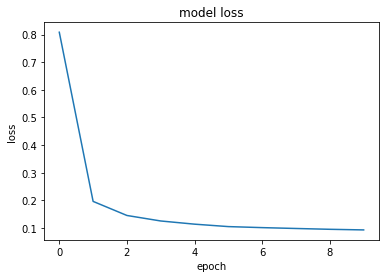

In [25]:
plt.plot(history.history['loss'])
#plt.plot(history.history['accuracy'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend([', 'test'], loc='upper left')
plt.show()


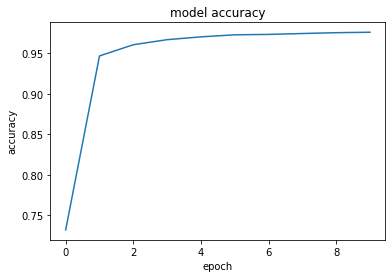

In [26]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Now let us define some helper functions, which we will use to preprocess this data.These functions are essentially doing the same work for cleaning and preprocessing data

In [47]:
def my_pipeline(text):
    text_new = preProcess_data(text)
    X = tokenizer.texts_to_sequences(pd.Series(text_new).values)
    X = pad_sequences(X, maxlen=28)
    return X

#### We pass our text to the pipeline function so that it can return the cleaned and preprocessed data, which we can feed to our loaded model and get the predictions. 

#### We can get the index of highest predictions using the argmax function from numpy. We can pick the maximum probability using the max function from Python

In [48]:
import tensorflow as tf
def predict(text):
    clean_text = my_pipeline(text)   
    
    #clean, and preprocess the text through pipeline
    loaded_model = tf.keras.models.load_model('intent.h5') 
    
    #load the saved model 
    predictions = loaded_model.predict(clean_text) 
    
    #predict the text
    sentiment = int(np.argmax(predictions)) 
    
    #calculate the index of max sentiment
    probability = max(predictions.tolist()[0]) 
    
    #calulate the probability
    if sentiment==0:
         t_sentiment = 'Appreciation' 
         
         #set appropriate sentiment
    elif sentiment==1:
         t_sentiment = 'community'

    elif sentiment==2:
         t_sentiment='done'
    elif sentiment==3:

         t_sentiment='Giveaway'

    elif sentiment==4:
         t_sentiment='Interested'

    elif sentiment==5:
         t_sentiment='Launching Soon'

    elif sentiment==6:
         t_sentiment='PinkSale'

    elif sentiment==7:
         t_sentiment=' PreSale'

    elif sentiment==8:
         t_sentiment='Whitelist'


    return { 
        
         #return the dictionary for endpoint
         "ACTUALL SENTENCE": text,
         "PREDICTED SENTIMENT": t_sentiment,
         "Probability": probability
    }

#### Here are some prediction 

In [49]:
predict("he entire 1-of-1 collection is done and ready to mint! stay tuned for the reveal tomorrow morning! ðŸ¥³ðŸ¥³ðŸ¥³ #NFT #axodoodles")

{'ACTUALL SENTENCE': 'he entire 1-of-1 collection is done and ready to mint! stay tuned for the reveal tomorrow morning! ðŸ¥³ðŸ¥³ðŸ¥³ #NFT #axodoodles',
 'PREDICTED SENTIMENT': 'done',
 'Probability': 0.9492520689964294}

In [50]:
predict("@ClassicSamurais PROJECT 21 - THE BEST GAMEFI PROJECT ON BSC")

{'ACTUALL SENTENCE': '@ClassicSamurais PROJECT 21 - THE BEST GAMEFI PROJECT ON BSC',
 'PREDICTED SENTIMENT': 'Appreciation',
 'Probability': 0.5726500153541565}

In [51]:
predict("Look what I found! Face #092 collectible https://t.co/jaLQgrWRbz #rarible #ethereum ")

{'ACTUALL SENTENCE': 'Look what I found! Face #092 collectible https://t.co/jaLQgrWRbz #rarible #ethereum ',
 'PREDICTED SENTIMENT': ' PreSale',
 'Probability': 0.5519793033599854}

In [52]:
predict("love it ðŸ˜ dm me  @nft__community_ https://t.co/Qtr50dIsza")

{'ACTUALL SENTENCE': 'love it ðŸ˜\x8d dm me  @nft__community_ https://t.co/Qtr50dIsza',
 'PREDICTED SENTIMENT': 'community',
 'Probability': 0.9946784973144531}

In [53]:
predict("@Waxel_NFT @taurenmeister @peachs303 @Rustytheredpan2 Thank you so much. More power to you guys! Continue the great project. So really cute artworks. Love it. â™¥")

{'ACTUALL SENTENCE': '@Waxel_NFT @taurenmeister @peachs303 @Rustytheredpan2 Thank you so much. More power to you guys! Continue the great project. So really cute artworks. Love it. â™¥',
 'PREDICTED SENTIMENT': 'Appreciation',
 'Probability': 0.9213311672210693}

In [54]:
predict("Just registered for the @HarakaiNFT raffle! Free mint and SUPER LOW SUPPLY! #FreeMint via @PREMINT_NFT https://t.co/BjJkmCKYHL")

{'ACTUALL SENTENCE': 'Just registered for the @HarakaiNFT raffle! Free mint and SUPER LOW SUPPLY! #FreeMint via @PREMINT_NFT https://t.co/BjJkmCKYHL',
 'PREDICTED SENTIMENT': 'PinkSale',
 'Probability': 0.9933279752731323}

In [55]:
predict('@mtnDAO PROJECT 21 - THE BEST GAMEFI PROJECT ON BSC âœ…Multistage deflation tool - PRO21 âœ…Multi-feature NFT âœ…App on AppStore and Google Play âœ…Presale in August. $P21 IS GOING TO THE MOON!Whitelist: https://t.co/rmc1cLo7mh TG: https://t.co/Gk1GFSZEX9 #Project21 #P21 #Gamefi')




{'ACTUALL SENTENCE': '@mtnDAO PROJECT 21 - THE BEST GAMEFI PROJECT ON BSC âœ…Multistage deflation tool - PRO21 âœ…Multi-feature NFT âœ…App on AppStore and Google Play âœ…Presale in August. $P21 IS GOING TO THE MOON!Whitelist: https://t.co/rmc1cLo7mh TG: https://t.co/Gk1GFSZEX9 #Project21 #P21 #Gamefi',
 'PREDICTED SENTIMENT': ' PreSale',
 'Probability': 0.9994971752166748}

In [56]:
predict("@CryptoBatzNFT @DarekBTW The first project in crypto with move to earn  #AstroBirdz. Big things happening with this project with release of marketplace and  #NEST.")

{'ACTUALL SENTENCE': '@CryptoBatzNFT @DarekBTW The first project in crypto with move to earn  #AstroBirdz. Big things happening with this project with release of marketplace and  #NEST.',
 'PREDICTED SENTIMENT': 'community',
 'Probability': 0.45536696910858154}

In [57]:
predict('Need Sick Character artâ“#art #artist #Artists #animation #illustrators #illustrations #illustrationart #NFT #NFTGiveaways #3Danimation #3dart #conceptart #Concept #illustrators #SolanaNFTs #ArtistOnTwitter @ScrimFinder @BlazedRTs @SGH_RTs @smallstreamhype @ShoutGamers https://t.co/Nf3Egckt78')

{'ACTUALL SENTENCE': 'Need Sick Character artâ\x9d“#art #artist #Artists #animation #illustrators #illustrations #illustrationart #NFT #NFTGiveaways #3Danimation #3dart #conceptart #Concept #illustrators #SolanaNFTs #ArtistOnTwitter @ScrimFinder @BlazedRTs @SGH_RTs @smallstreamhype @ShoutGamers https://t.co/Nf3Egckt78',
 'PREDICTED SENTIMENT': 'Giveaway',
 'Probability': 0.9999880790710449}

In [58]:
predict('ðŸŽ‰ Just registered for the saphire on @PREMINT_NFT! https://t.co/lNIXaPFL4j')

{'ACTUALL SENTENCE': 'ðŸŽ‰ Just registered for the saphire on @PREMINT_NFT! https://t.co/lNIXaPFL4j',
 'PREDICTED SENTIMENT': 'PinkSale',
 'Probability': 0.9897081851959229}

In [59]:
predict('twitter list: from the wipeout of cryptocurrencies and plunge in nft token values, one thing is clear about celebrity endorsements: itâ€™s been a disaster for fans.here are the celebrities .. https://t.co/Pa4f3cUluZ')

{'ACTUALL SENTENCE': 'twitter list: from the wipeout of cryptocurrencies and plunge in nft token values, one thing is clear about celebrity endorsements: itâ€™s been a disaster for fans.here are the celebrities .. https://t.co/Pa4f3cUluZ',
 'PREDICTED SENTIMENT': 'Appreciation',
 'Probability': 0.7123122215270996}

In [60]:
predict("1 Traded Collection (Last 15min):Life's A Joke NFT OfficialSales: 68Unique Buyers: 54Avg Price: 0.04 ÎžLink: https://t.co/N5WEmMPCMP#opensea #OpenSeaNFT #NFT #nftcollectors")

{'ACTUALL SENTENCE': "1 Traded Collection (Last 15min):Life's A Joke NFT OfficialSales: 68Unique Buyers: 54Avg Price: 0.04 ÎžLink: https://t.co/N5WEmMPCMP#opensea #OpenSeaNFT #NFT #nftcollectors",
 'PREDICTED SENTIMENT': ' PreSale',
 'Probability': 0.7292028665542603}

In [61]:
predict("Your art is very uniqueðŸ”¥#NFT #NFTCommuntiy #nftartiÌ‡st https://t.co/Jegq6a5AtB")

{'ACTUALL SENTENCE': 'Your art is very uniqueðŸ”¥#NFT #NFTCommuntiy #nftartiÌ‡st https://t.co/Jegq6a5AtB',
 'PREDICTED SENTIMENT': ' PreSale',
 'Probability': 0.37199991941452026}